In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../../data/media.csv', sep=':')
df = df.applymap(lambda x: str(x).replace(',', '.'))
df['x pos'] = df['x pos'].astype(float) 
df['y pos'] = df['y pos'].astype(float) 
df['z pos'] = df['z pos'].astype(float) 
df['x neg'] = df['x neg'].astype(float) 
df['y neg'] = df['y neg'].astype(float) 
df['z neg'] = df['z neg'].astype(float) 
df.to_csv('../../data/media.csv', ',')


/tmp/ipykernel_756/1202562363.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(',', '.'))


In [3]:
df_medidas = pd.read_csv('../../data/medidas.csv', sep=':')
df_medidas = df_medidas.applymap(lambda x: str(x).replace(',', '.'))
df_medidas.to_csv('../../data/medidas_novo.csv')

/tmp/ipykernel_756/178547580.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_medidas = df_medidas.applymap(lambda x: str(x).replace(',', '.'))


In [7]:
df_medidas

,x pos,x neg,y pos,y neg,z pos,z neg
0,1.01,-0.94,1.01,-1.00,1.05,-0.96
1,1.02,-0.95,1.01,-1.00,1.04,-0.98
2,1.01,-0.95,1.00,-1.00,1.04,-0.97
3,1.02,-0.96,1.00,-1.00,1.04,-0.96
4,1.02,-0.95,1.01,-1.00,1.04,-0.96
...,...,...,...,...,...,...
95,1.02,-0.94,1.01,-1.00,1.03,-0.96
96,1.02,-0.93,1.00,-1.00,1.04,-0.97
97,1.03,-0.93,1.01,-1.00,1.03,-0.96
98,1.02,-0.94,1.00,-0.99,1.04,-0.96


In [22]:
df

,x pos,x neg,y pos,y neg,z pos,z neg
0,1.01,-0.95,1.0,-1.0,1.04,-0.96


## Saida do sensor
$$A_{saida} = Ganho × A_{ref} + A{offset}$$


$\text{A}_{\text{saida}}$: valor de aceleração na saída do sensor medido em valores de gravidade [g]

$\text{Ganho}$: parâmetro adimensional. No caso em que os movimentos no sensor somente se vejam  
afetados pela aceleração devida a gravidade, o ganho deve estar muito próximo de 1.

$\text{A}_{\text{ref}}$ : valor de aceleração de referência. Para nosso caso, ±1 g.  

$\text{A}_{\text{offset}}$: valor de aceleração fixo que afeta as leituras em cada eixo do sensor. Pode ser considerado um erro sistemático do sistema  


## Obtenção do ganho

$$\bar{A}_{+1g,i} = Ganho_{}\cdot(1g) + A_{offset,i}$$
$$\bar{A}_{-1g,i} = Ganho_{}\cdot(-1g) + A_{offset,i}$$



In [26]:
# Montemos a matriz Ax = b para encontrar os valores de Ganho e Aoffset

# Eixo_x
b_x = [df['x pos'][0], df['x neg'][0]]

A = [[1, 1], [-1, 1]]

b_y = [df['y pos'][0], df['y neg'][0]]
b_z = [df['z pos'][0], df['z neg'][0]]

print("Valores de b: ", b_x)
print("Valores de b: ", b_y)
print("Valores de b: ", b_z)
print("Valores de A: ", A)


Valores de b:  [1.01, -0.95]
Valores de b:  [1.0, -1.0]
Valores de b:  [1.04, -0.96]
Valores de A:  [[1, 1], [-1, 1]]


In [27]:
# Resolvendo o sistema
solucao_x = np.linalg.solve(A, b_x)
solucao_y = np.linalg.solve(A, b_y)
solucao_z = np.linalg.solve(A, b_z)


In [28]:
print("Ganho x: ", solucao_x[0])
print("Offset x: ", solucao_x[1])
print("Ganho y: ", solucao_y[0])
print("Offset y: ", solucao_y[1])
print("Ganho z: ", solucao_z[0])
print("Offset z: ", solucao_z[1])

Ganho x:  0.98
Offset x:  0.030000000000000027
Ganho y:  1.0
Offset y:  0.0
Ganho z:  1.0
Offset z:  0.040000000000000036


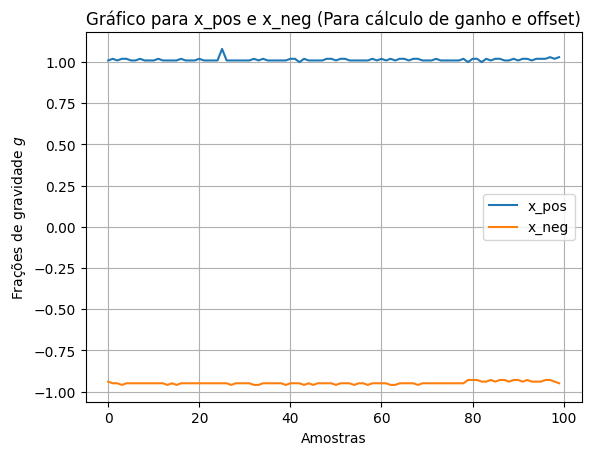

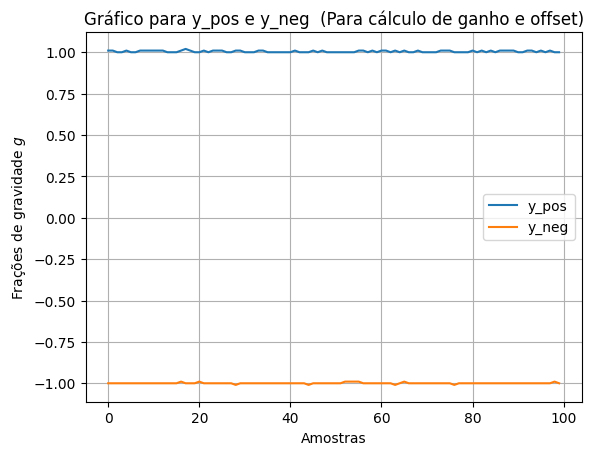

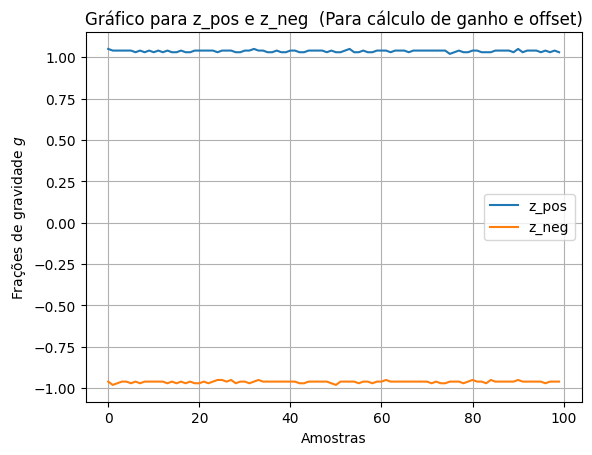

In [21]:
# Gráfico das medidas 
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

# Carregar dados do CSV para um array NumPy
dados = np.genfromtxt('../../data/medidas_novo.csv', delimiter=',', skip_header=1)

x_pos = dados[:, 1]
x_neg = dados[:, 2]
y_pos = dados[:, 3]
y_neg = dados[:, 4]
z_pos = dados[:, 5]
z_neg = dados[:, 6]

plt.plot(x_pos, label='x_pos')
plt.plot(x_neg, label='x_neg')
plt.legend()
plt.title('Gráfico para x_pos e x_neg (Para cálculo de ganho e offset)')
plt.xlabel('Amostras')
plt.ylabel('Frações de gravidade $g$')
plt.grid(visible=True, axis='both')
plt.show()

plt.plot(y_pos, label='y_pos')
plt.plot(y_neg, label='y_neg')
plt.legend()
plt.title('Gráfico para y_pos e y_neg  (Para cálculo de ganho e offset)')
plt.xlabel('Amostras')
plt.ylabel('Frações de gravidade $g$')
plt.grid(visible=True, axis='both')
plt.show()

plt.plot(z_pos, label='z_pos')
plt.plot(z_neg, label='z_neg')
plt.legend()
plt.title('Gráfico para z_pos e z_neg  (Para cálculo de ganho e offset)')
plt.xlabel('Amostras')
plt.ylabel('Frações de gravidade $g$')
plt.grid(visible=True, axis='both')
plt.show()


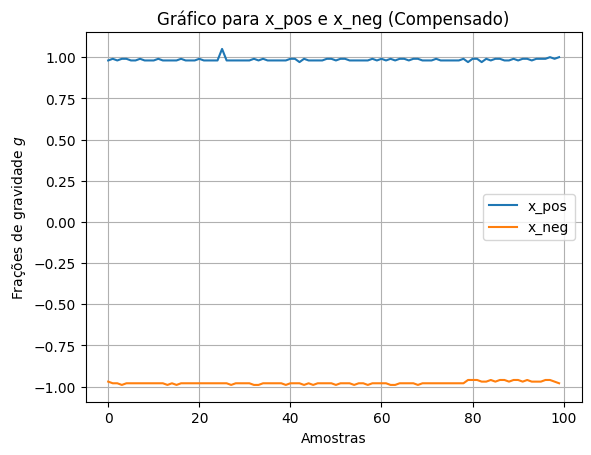

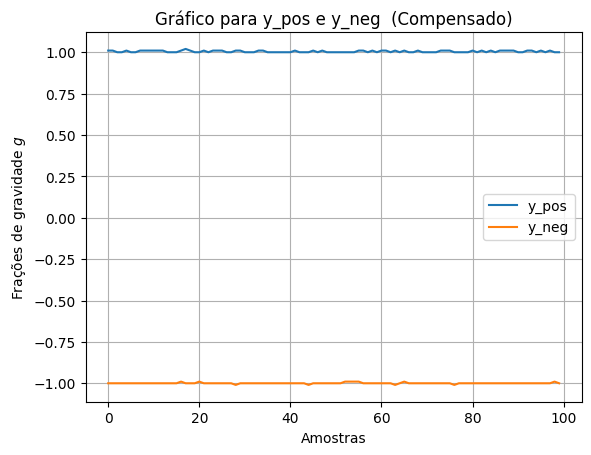

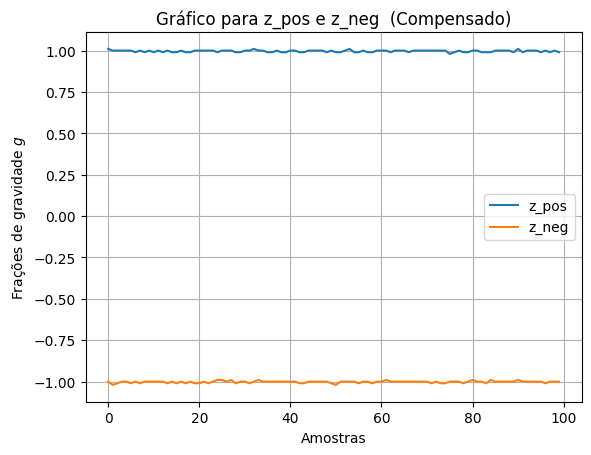

In [29]:
# Gráfico das medidas 
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

# Carregar dados do CSV para um array NumPy
dados = np.genfromtxt('../../data/medidas_novo.csv', delimiter=',', skip_header=1)

x_pos = dados[:, 1] - solucao_x[1]
x_neg = dados[:, 2] - solucao_x[1]
y_pos = dados[:, 3] - solucao_y[1]
y_neg = dados[:, 4] - solucao_y[1]
z_pos = dados[:, 5] - solucao_z[1]
z_neg = dados[:, 6] - solucao_z[1]

plt.plot(x_pos, label='x_pos')
plt.plot(x_neg, label='x_neg')
plt.legend()
plt.title('Gráfico para x_pos e x_neg (Compensado)')
plt.xlabel('Amostras')
plt.ylabel('Frações de gravidade $g$')
plt.grid(visible=True, axis='both')
plt.show()

plt.plot(y_pos, label='y_pos')
plt.plot(y_neg, label='y_neg')
plt.legend()
plt.title('Gráfico para y_pos e y_neg  (Compensado)')
plt.xlabel('Amostras')
plt.ylabel('Frações de gravidade $g$')
plt.grid(visible=True, axis='both')
plt.show()

plt.plot(z_pos, label='z_pos')
plt.plot(z_neg, label='z_neg')
plt.legend()
plt.title('Gráfico para z_pos e z_neg  (Compensado)')
plt.xlabel('Amostras')
plt.ylabel('Frações de gravidade $g$')
plt.grid(visible=True, axis='both')
plt.show()


array([0.01, 0.02, 0.01, 0.02, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.01, 0.08, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.  , 0.02,
       0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.02, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.02,
       0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.02, 0.  , 0.02, 0.02, 0.  , 0.02, 0.01, 0.02, 0.02, 0.01,
       0.01, 0.02, 0.01, 0.02, 0.02, 0.01, 0.02, 0.02, 0.02, 0.03, 0.02,
       0.03])